
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

<p>Classification problem; because the target is a categorical data, which involves yes or no as output.</p>

## Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [62]:
# Read student data
dataset=pd.read_csv('student-data.csv')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [64]:
# Calculate number of students
dataset['sex'].count()

395

In [65]:
# Calculate number of features
dataset.shape

(395, 31)

*30 columns in dataset, the 'passed'column is target; so 29 features*

In [66]:
# Calculate passing students
dataset['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

*Out of 395 students; 265 students passed out of school*

In [67]:
# Calculate failing students

*Out of 395 students; 130 students failed.*

In [68]:
# Calculate graduation rate

In [69]:
# Print the results
dataset['passed'].value_counts(normalize=True) * 100

yes    67.088608
no     32.911392
Name: passed, dtype: float64

*Graduation rate=67.08%*

## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [70]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [71]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

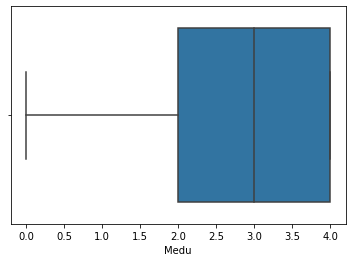

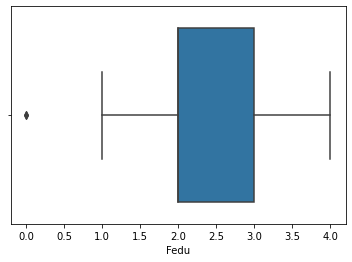

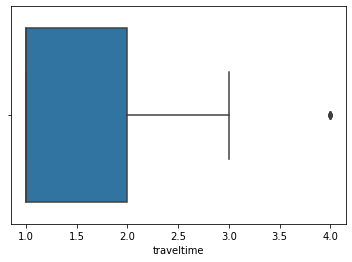

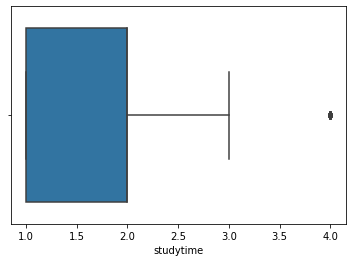

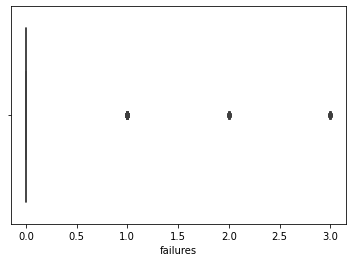

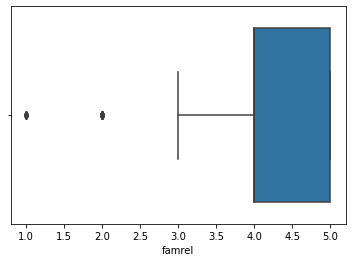

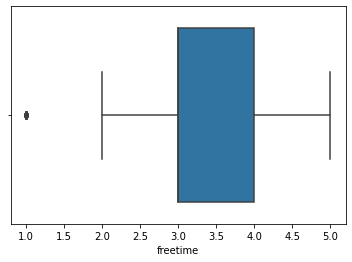

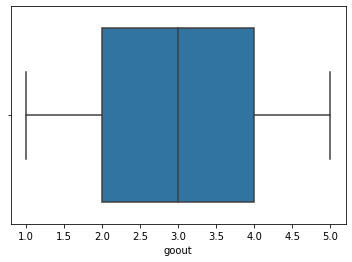

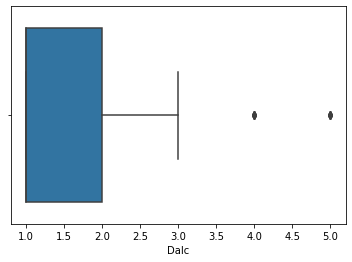

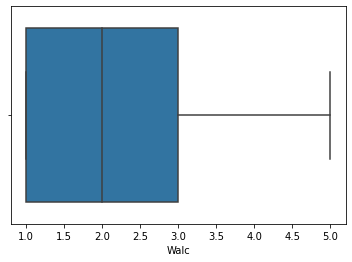

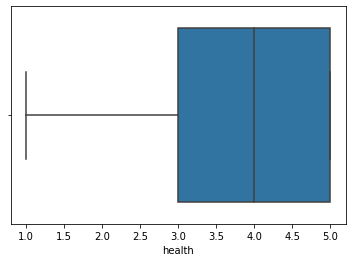

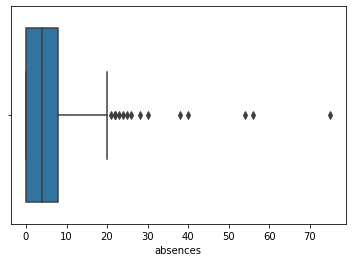

In [72]:
for i in ['Medu', 'Fedu','traveltime', 'studytime','failures','famrel','freetime', 'goout', 'Dalc','Walc', 'health', 'absences']:
    #plt.title(i)
    sns.boxplot(x=dataset[i])
    plt.show() 

<b>Outliers in 'absences' column indicates abnormal absent students; which need attention and care.They are:</b>

In [73]:
Q1=np.percentile(dataset['absences'],25,interpolation='midpoint')
Q3=np.percentile(dataset['absences'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in dataset['absences']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
print('Outliers of absences data=',outlier)
print('The corresponding indexes are as follows:')
ind1=dataset['absences'][(dataset['absences']<lower_limit)|(dataset['absences']>upper_limit)].index
dataset.loc[ind1].index

Outliers of absences data= [25, 54, 26, 56, 24, 28, 22, 21, 75, 22, 30, 38, 22, 40, 23]
The corresponding indexes are as follows:


Int64Index([40, 74, 103, 183, 198, 205, 216, 260, 276, 277, 280, 307, 313, 315,
            320],
           dtype='int64')

<b>Outlier in 'traveltime' has to be found out and should provide hostel accomadation, this could help him/her in studies</b>

In [74]:
Q1=np.percentile(dataset['traveltime'],25,interpolation='midpoint')
Q3=np.percentile(dataset['traveltime'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in dataset['traveltime']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
print('Outliers of traveltime data=',outlier)
print('The corresponding indexes are as follows:')
ind1=dataset['traveltime'][(dataset['traveltime']<lower_limit)|(dataset['traveltime']>upper_limit)].index
dataset.loc[ind1].index

Outliers of traveltime data= [4, 4, 4, 4, 4, 4, 4, 4]
The corresponding indexes are as follows:


Int64Index([61, 108, 134, 149, 164, 228, 327, 375], dtype='int64')

<b>Outliers in 'failures' has to be found out and should be provided with special attention and extra classes, this could help them in studies</b>

In [75]:
Q1=np.percentile(dataset['failures'],25,interpolation='midpoint')
Q3=np.percentile(dataset['failures'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in dataset['failures']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
print('Outliers of traveltime data=',outlier)
print('The corresponding indexes are as follows:')
ind1=dataset['failures'][(dataset['failures']<lower_limit)|(dataset['failures']>upper_limit)].index
dataset.loc[ind1].index

Outliers of traveltime data= [3, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 2, 3, 3, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3]
The corresponding indexes are as follows:


Int64Index([  2,  18,  25,  40,  44,  49,  52,  72,  78,  85,  88,  95, 111,
            112, 118, 127, 128, 130, 137, 138, 141, 144, 146, 149, 150, 151,
            152, 153, 157, 159, 160, 161, 162, 164, 165, 170, 173, 198, 205,
            206, 213, 216, 217, 221, 225, 239, 247, 248, 250, 252, 255, 270,
            278, 281, 292, 304, 305, 307, 308, 309, 310, 312, 313, 314, 315,
            336, 340, 341, 343, 349, 350, 352, 353, 361, 367, 370, 376, 383,
            384, 387, 389, 390, 392],
           dtype='int64')

<b>Outliers in 'famrel' has to be found out and should be provided with special attention and counciling, this could help them in studies and mental wellbeing</b>

In [76]:
Q1=np.percentile(dataset['famrel'],25,interpolation='midpoint')
Q3=np.percentile(dataset['famrel'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in dataset['famrel']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
print('Outliers of famrel data=',outlier)
print('The corresponding indexes are as follows:')
ind1=dataset['famrel'][(dataset['famrel']<lower_limit)|(dataset['famrel']>upper_limit)].index
dataset.loc[ind1].index

Outliers of famrel data= [1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2]
The corresponding indexes are as follows:


Int64Index([ 25,  27,  37,  46,  60,  66,  79, 108, 140, 141, 150, 156, 184,
            206, 207, 222, 238, 240, 278, 296, 299, 349, 357, 363, 389, 391],
           dtype='int64')

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

*Columns which require label encoding(2 unique values)*

In [77]:
categorical_cols1=['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [78]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

In [79]:
dataset[categorical_cols1] = dataset[categorical_cols1].apply(label_en.fit_transform)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    int32 
 1   sex         395 non-null    int32 
 2   age         395 non-null    int64 
 3   address     395 non-null    int32 
 4   famsize     395 non-null    int32 
 5   Pstatus     395 non-null    int32 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int32 
 16  famsup      395 non-null    int32 
 17  paid        395 non-null    int32 
 18  activities  395 non-null    int32 
 19  nursery     395 non-null    int32 
 20  higher    

In [80]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,at_home,teacher,...,0,0,4,3,4,1,1,3,6,no
1,0,0,17,1,0,1,1,1,at_home,other,...,1,0,5,3,3,1,1,3,4,no
2,0,0,15,1,1,1,1,1,at_home,other,...,1,0,4,3,2,2,3,3,10,yes
3,0,0,15,1,0,1,4,2,health,services,...,1,1,3,2,2,1,1,5,2,yes
4,0,0,16,1,0,1,3,3,other,other,...,0,0,4,3,2,1,2,5,4,yes


*Columns which require one hot encoding(3 or more than unique values)*

In [81]:
categorical_cols2=['Mjob','Fjob','reason','guardian']

In [82]:
df=pd.get_dummies(dataset,columns=categorical_cols2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             395 non-null    int32 
 1   sex                395 non-null    int32 
 2   age                395 non-null    int64 
 3   address            395 non-null    int32 
 4   famsize            395 non-null    int32 
 5   Pstatus            395 non-null    int32 
 6   Medu               395 non-null    int64 
 7   Fedu               395 non-null    int64 
 8   traveltime         395 non-null    int64 
 9   studytime          395 non-null    int64 
 10  failures           395 non-null    int64 
 11  schoolsup          395 non-null    int32 
 12  famsup             395 non-null    int32 
 13  paid               395 non-null    int32 
 14  activities         395 non-null    int32 
 15  nursery            395 non-null    int32 
 16  higher             395 non-null    int32 
 1

In [83]:
# Extract feature columns

In [84]:
x=df.drop(['passed'],axis=1)
y=pd.DataFrame(df['passed'])

In [85]:
# Extract target column 'passed'

In [86]:
print(y.head())
y.info()

  passed
0     no
1     no
2    yes
3    yes
4    yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   passed  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [87]:
# Separate the data into feature data and target data (X and y, respectively)

In [88]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [89]:
# splitting the data into train and test

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2405063291)

In [91]:
# Show the results of the split
x.shape

(395, 43)

In [92]:
x_train.shape

(300, 43)

In [93]:
y_train.shape

(300, 1)

In [94]:
x_test.shape

(95, 43)

In [95]:
y_test.shape

(95, 1)

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

<p>1. Random Forest Method</p><p>2. Logistic Regression</p><p>3. K-NN Model</p>

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [96]:
#explaination

In [97]:
# Import the three supervised learning models from sklearn


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [99]:
# fit model-1  on traning data 

## 1. Random Forest Method

In [100]:
rf=RandomForestClassifier(n_estimators=200,max_depth=50,random_state=42,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
a7=accuracy_score(y_test,y_pred)
p7=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r7=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f7=f1_score(y_test, y_pred,pos_label='positive',average='macro')
p_rf=pd.DataFrame([a7,p7,r7,f7,Mis_class])
p_rf.columns=['Random Forest Method']

<ipython-input-100-79f0f269aad3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored 

In [101]:
# predict on the test data 


In [102]:
y_pred=rf.predict(x_test)
y_pred

array(['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes'], dtype=object)

In [103]:
y_train

,passed
210,no
75,yes
104,yes
374,yes
16,yes
...,...
71,yes
106,no
270,no
348,yes


In [104]:
# calculate the accuracy score

In [105]:
print('accuracy of Random Forest model:',accuracy_score(y_test,y_pred))

accuracy of Random Forest model: 0.6421052631578947


In [106]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

## 2. Logistic Regression

In [107]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)


cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
a1=accuracy_score(y_test,y_pred)
p1=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r1=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f1=f1_score(y_test, y_pred,pos_label='positive',average='macro')
p_lr=pd.DataFrame([a1,p1,r1,f1,Mis_class])
p_lr.columns=['logistic regression'] 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a sing

In [108]:
y_pred=logit_model.predict(x_test)
y_pred

array(['no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype=object)

In [109]:
y_test

,passed
78,yes
371,yes
248,no
55,yes
390,no
...,...
320,yes
175,no
238,yes
368,yes


In [110]:
print('accuracy of Logistic Regression model:',accuracy_score(y_test,y_pred))

accuracy of Logistic Regression model: 0.7052631578947368


In [111]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

## 3. K-NN Model

In [112]:

#finding optimum value of K
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Text(0, 0.5, 'accuracy')

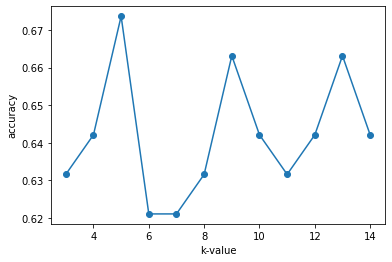

In [113]:
#Optimum Value of K
plt.plot(neighbors,acc_values,"o-")
plt.xlabel('k-value')
plt.ylabel('accuracy')

In [114]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
a2=accuracy_score(y_test,y_pred)
p2=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r2=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f2=f1_score(y_test, y_pred,pos_label='positive',average='macro')
p_knn=pd.DataFrame([a2,p2,r2,f2,Mis_class])
p_knn.columns=['K-NN Model']

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note t

In [115]:
print('accuracy of KNN Model:',accuracy_score(y_test,y_pred))

accuracy of KNN Model: 0.6736842105263158


## 4. SVM- Radial

In [116]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
a6=accuracy_score(y_test,y_pred)
p6=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r6=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f6=f1_score(y_test, y_pred,pos_label='positive',average='macro')
p_svmr=pd.DataFrame([a6,p6,r6,f6,Mis_class])
p_svmr.columns=['Radial SVM']

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'pos

In [117]:
print('accuracy of Radial SVM:',accuracy_score(y_test,y_pred))

accuracy of Radial SVM: 0.631578947368421


## 5. SVM-Polynomial

In [118]:
svm_radial=SVC(kernel='poly',degree=3)
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
Mis_class=cm[0,1]+cm[1,0]
a5=accuracy_score(y_test,y_pred)
p5=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r5=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f5=f1_score(y_test, y_pred,pos_label='positive',average='macro')
p_svmp=pd.DataFrame([a5,p5,r5,f5,Mis_class])
p_svmp.columns=['Polynomial SVM']

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that po

In [119]:
print('accuracy of polynomial SVM:',accuracy_score(y_test,y_pred))

accuracy of polynomial SVM: 0.6421052631578947


# Comparison

In [120]:
performance_comparison=pd.concat([p_rf,p_lr,p_svmr,p_svmp,p_knn],axis=1)
performance_comparison['Performance Metrics']=['Accuracy Score','Precision Score','Recall Score','F1-Score','Mis-Classifications in prediction of 95 test points']
performance_comparison=performance_comparison.set_index('Performance Metrics')
performance_comparison

,Random Forest Method,logistic regression,Radial SVM,Polynomial SVM,K-NN Model
Performance Metrics,,,,,
Accuracy Score,0.642105,0.705263,0.631579,0.642105,0.673684
Precision Score,0.609578,0.697368,0.315789,0.653986,0.654272
Recall Score,0.532143,0.635714,0.500000,0.520238,0.592857
F1-Score,0.480373,0.637800,0.387097,0.440789,0.584568
Mis-Classifications in prediction of 95 test points,34.000000,28.000000,35.000000,34.000000,31.000000


# Logistic Regression provides best predictions among all other ML Models employed here(according the the accuracy and f1 scores)
